In [1]:
# SPECIFICATIONS
import numpy as np
from keras.models import Sequential
from keras.layers import Dense, Activation
from keras.datasets import boston_housing
from keras.optimizers import Adam
from sklearn.preprocessing import StandardScaler

In [2]:
# LOAD DATASET
(x_train, y_train), (x_test, y_test) = boston_housing.load_data()

scalar = StandardScaler()
x_train = scalar.fit_transform(x_train)
x_test = scalar.transform(x_test)

In [3]:
# BUILD AND TRAIN MODEL
model = Sequential()
model.add(Dense(5, activation='relu', input_shape=(x_train.shape[1],)))
model.add(Dense(5, activation='relu'))
model.add(Dense(5, activation='relu'))
model.add(Dense(1, activation='relu'))

model.summary()
model.compile(optimizer=Adam(learning_rate=0.01), loss='mean_absolute_error')
history = model.fit(x_train, y_train, epochs=20, batch_size=10, validation_split=0.15)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 5)                 70        
                                                                 
 dense_1 (Dense)             (None, 5)                 30        
                                                                 
 dense_2 (Dense)             (None, 5)                 30        
                                                                 
 dense_3 (Dense)             (None, 1)                 6         
                                                                 
Total params: 136
Trainable params: 136
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
35/35 [==============================] - 1s 12ms/step - loss: 20.8478 - val_loss: 20.2998
Epoch 2/20
35/35 [==============================] - 0s 3ms/step - loss: 14.1911 - val_los

In [4]:
# PREDICT
test_loss = model.evaluate(x_test, y_test)
print("Test Loss:", test_loss)

# Generate the actual predictions for our test set
predictions = model.predict(x_test)

4/4 [==============================] - 0s 3ms/step - loss: 2.7503
Test Loss: 2.750310182571411
4/4 [==============================] - 0s 2ms/step


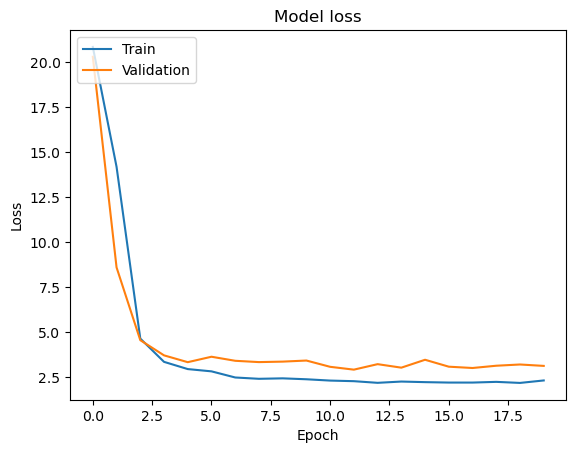

In [5]:
# TRAINING AND VALIDATION PLOT
import matplotlib.pyplot as plt

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()